In [5]:
import os, sys
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
file = '../../../20191204_peptide_aptamer_pairs.csv'

## General metrics about the file

In [11]:
# Generate a dictionary from peptide --> [(aptamer, read count)]
all_aptamers = []
dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 8:
                    continue
                peptide = save 
            if len(peptide) < 8:
                continue
            
            if peptide not in dataset.keys():
                dataset[peptide] = []
            dataset[peptide].append((aptamer, rc))
            all_aptamers.append(aptamer)
        line_count += 1
    print("Number of lines: ", line_count)

Column names are Peptide, Aptamer, Read Count
Number of lines:  595072


437772
count of  3 : 0
count of  4 : 0
count of  5 : 0
count of  6 : 0
count of  7 : 0
count of  8 : 437772


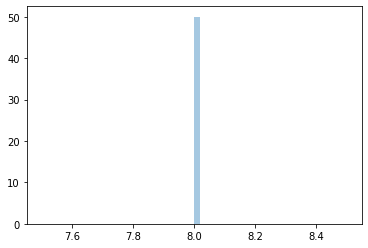

In [14]:
print(str(len(dataset.keys())))
peptides = list(dataset.keys())
lengths = [len(p) for p in peptides]
sns.distplot(lengths, hist=True, norm_hist=True)
for i in range(3, 9):
    print("count of ", i, ":", lengths.count(i))

## Split the dataset into binding affinity groups

Affinity Groups:  [24449, 41890, 129699, 399033]


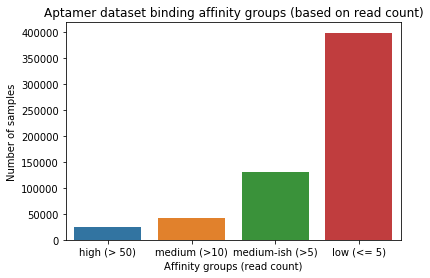

In [14]:
affinity_groups = [0, 0, 0, 0]
x = ['high (> 50)', 'medium (>10)', 'medium-ish (>5)', 'low (<= 5)']
for peptide in dataset:
    for a, r in dataset[peptide]:
        r = int(r)
        if r > 50:
            affinity_groups[0] += 1
        elif r > 10:
            affinity_groups[1] += 1
        elif r > 5:
            affinity_groups[2] += 1
        else:
            affinity_groups[3] += 1

print("Affinity Groups: ", affinity_groups)          
plt.title("Aptamer dataset binding affinity groups (based on read count)")
plt.xlabel("Affinity groups (read count)")
plt.ylabel("Number of samples")
sns.barplot(x, affinity_groups)

## Write the dataset into a json file

In [ ]:
# Dictionary should be aptamer --> [(peptide, aff), ...., ]
aptamer_dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 3:
                    continue
                peptide = save 
            if aptamer not in aptamer_dataset.keys():
                aptamer_dataset[aptamer] = []
            
            aptamer_dataset[aptamer].append((peptide, rc))
        line_count +=1

with open('aptamer_dataset.json', 'w') as f:
    json.dump(aptamer_dataset, f)
    print("Wrote to dataset file")

## Test to see if the datasets are uniform

In [15]:
# Reduce the peptides to only peptides with 8 AA
all_peptides = [p for p in peptides if len(p) > 7]
all_aptamers = [a for a in all_aptamers if len(a) == 40]

count = 0
for a in all_aptamers:
    if len(a) < 40:
        count += 1
print("Count of aptamers that are not 40 N long: ", count)

print(len(all_peptides))
print(len(set(all_peptides)))
print(len(all_aptamers))
print(len(set(all_aptamers)))

Count of aptamers that are not 40 N long:  0
437772
437772
594900
557824


## Test if each position of peptides is uniformly distributed

-------------Position  1 --------------
{'S': 43220, 'A': 33786, 'G': 46852, 'T': 19891, 'V': 29716, 'Y': 11697, 'C': 15577, 'K': 17991, 'R': 50625, 'F': 10416, 'P': 19064, 'L': 37218, 'Q': 13682, 'E': 19393, 'I': 9921, 'D': 10263, 'W': 18957, 'N': 8740, 'M': 12809, 'H': 7954}


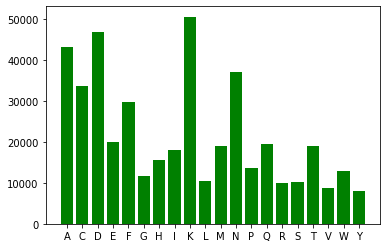

-------------Position  2 --------------
{'M': 13462, 'L': 41192, 'K': 14343, 'P': 21535, 'G': 49826, 'A': 34266, 'W': 20343, 'T': 18668, 'V': 35845, 'D': 10155, 'S': 36068, 'R': 51024, 'I': 9618, 'C': 15172, 'E': 17821, 'F': 10033, 'Q': 12469, 'H': 8509, 'N': 8226, 'Y': 9197}


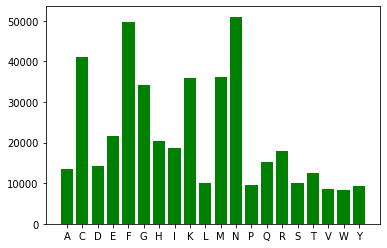

-------------Position  3 --------------
{'V': 37111, 'A': 33213, 'T': 17544, 'R': 52974, 'E': 18000, 'Q': 12778, 'W': 21391, 'Y': 9153, 'L': 40641, 'N': 7897, 'P': 16781, 'G': 53205, 'I': 9660, 'K': 14504, 'D': 10089, 'S': 34922, 'C': 15778, 'F': 10041, 'M': 13716, 'H': 8374}


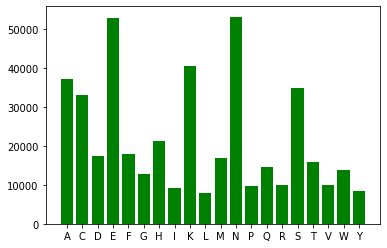

-------------Position  4 --------------
{'N': 7992, 'G': 55392, 'M': 13802, 'A': 33426, 'H': 7890, 'V': 38056, 'L': 38804, 'D': 10723, 'F': 11016, 'P': 15765, 'R': 52220, 'I': 9745, 'S': 33199, 'Q': 12212, 'Y': 9102, 'C': 15494, 'E': 18791, 'W': 22543, 'T': 16916, 'K': 14684}


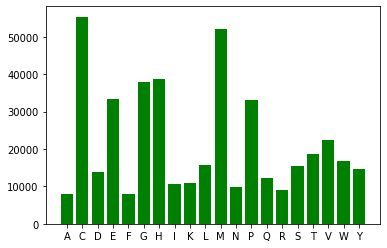

-------------Position  5 --------------
{'S': 31861, 'G': 55577, 'L': 39767, 'Q': 11449, 'A': 32623, 'V': 39244, 'D': 10381, 'M': 14204, 'C': 15871, 'R': 53460, 'F': 10725, 'P': 14845, 'I': 10060, 'Y': 8842, 'W': 23835, 'N': 7544, 'K': 14677, 'E': 18113, 'T': 17089, 'H': 7605}


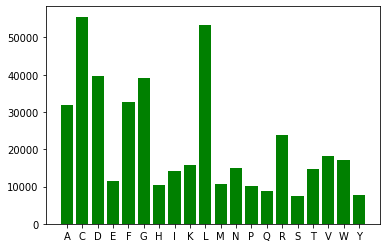

-------------Position  6 --------------
{'I': 8977, 'V': 40328, 'G': 67848, 'E': 20308, 'R': 53961, 'Y': 8043, 'S': 29183, 'C': 15540, 'W': 24039, 'A': 33638, 'Q': 9986, 'P': 14131, 'T': 15716, 'M': 12955, 'H': 6373, 'D': 10112, 'L': 37842, 'K': 12083, 'N': 6705, 'F': 10004}


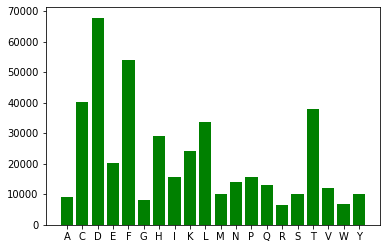

-------------Position  7 --------------
{'F': 10574, 'V': 40250, 'H': 8758, 'C': 16205, 'G': 70845, 'W': 23193, 'E': 18844, 'R': 54071, 'T': 15654, 'Q': 10873, 'S': 31983, 'K': 11444, 'I': 10159, 'Y': 8176, 'L': 34877, 'M': 11766, 'D': 11652, 'A': 28254, 'P': 12881, 'N': 7313}


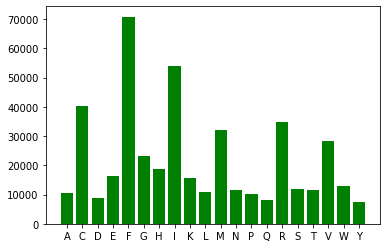

In [37]:
for i in range(1,8):
    char = dict()
    for p in peptides:
        if p[i] not in char:
            char[p[i]] = 1
        else:
            char[p[i]] += 1
    print("-------------Position ", i, "--------------")
    print(char)
    plt.bar(sorted(list(char.keys())), list(char.values()), color='g')
    plt.show()